In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

from experiment1 import run as run1, plot as plot1
from experiment2 import run as run2, plot as plot2
from experiment3 import run as run3, plot as plot3

## Experiment 1

In [3]:
run1()

dataset: adult
  fold: 1


Epoch: 100%|██████████| 10/10 [00:04<00:00,  2.15it/s, loss=0.607, epoch accu=0.
100%|███████████████████████| 10/10 [00:05<00:00,  1.86it/s]


  fold: 2


Epoch: 100%|██████████| 10/10 [00:04<00:00,  2.11it/s, loss=0.607, epoch accu=0.
100%|███████████████████████| 10/10 [00:05<00:00,  1.87it/s]


  fold: 3


Epoch: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s, loss=0.61, epoch accu=0.7
100%|███████████████████████| 10/10 [00:05<00:00,  1.83it/s]


  fold: 4


Epoch: 100%|██████████| 10/10 [00:04<00:00,  2.16it/s, loss=0.607, epoch accu=0.
100%|███████████████████████| 10/10 [00:05<00:00,  1.91it/s]


  fold: 5


Epoch: 100%|██████████| 10/10 [00:04<00:00,  2.10it/s, loss=0.609, epoch accu=0.
100%|███████████████████████| 10/10 [00:05<00:00,  1.91it/s]


dataset: heloc
  fold: 1


Epoch: 100%|██████████| 10/10 [00:01<00:00,  5.86it/s, loss=0.727, epoch accu=0.
100%|███████████████████████| 10/10 [00:02<00:00,  4.91it/s]


  fold: 2


Epoch: 100%|██████████| 10/10 [00:01<00:00,  6.06it/s, loss=0.727, epoch accu=0.
100%|███████████████████████| 10/10 [00:01<00:00,  5.15it/s]


  fold: 3


Epoch: 100%|██████████| 10/10 [00:01<00:00,  5.95it/s, loss=0.727, epoch accu=0.
100%|███████████████████████| 10/10 [00:01<00:00,  5.11it/s]


  fold: 4


Epoch: 100%|██████████| 10/10 [00:01<00:00,  5.84it/s, loss=0.726, epoch accu=0.
100%|███████████████████████| 10/10 [00:01<00:00,  5.37it/s]


  fold: 5


Epoch: 100%|██████████| 10/10 [00:02<00:00,  4.87it/s, loss=0.727, epoch accu=0.
100%|███████████████████████| 10/10 [00:02<00:00,  4.92it/s]


dataset: house
  fold: 1


Epoch: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s, loss=0.839, epoch accu=0.
100%|███████████████████████| 10/10 [00:04<00:00,  2.32it/s]


  fold: 2


Epoch: 100%|██████████| 10/10 [00:03<00:00,  2.59it/s, loss=0.838, epoch accu=0.
100%|███████████████████████| 10/10 [00:04<00:00,  2.23it/s]


  fold: 3


Epoch: 100%|██████████| 10/10 [00:03<00:00,  2.69it/s, loss=0.838, epoch accu=0.
100%|███████████████████████| 10/10 [00:03<00:00,  2.52it/s]


  fold: 4


Epoch: 100%|██████████| 10/10 [00:03<00:00,  2.85it/s, loss=0.839, epoch accu=0.
100%|███████████████████████| 10/10 [00:03<00:00,  2.55it/s]


  fold: 5


Epoch: 100%|██████████| 10/10 [00:03<00:00,  2.72it/s, loss=0.839, epoch accu=0.
100%|███████████████████████| 10/10 [00:04<00:00,  2.49it/s]


dataset: magic
  fold: 1


Epoch: 100%|██████████| 10/10 [00:02<00:00,  3.46it/s, loss=0.664, epoch accu=0.
100%|███████████████████████| 10/10 [00:03<00:00,  3.11it/s]


  fold: 2


Epoch: 100%|██████████| 10/10 [00:02<00:00,  3.71it/s, loss=0.663, epoch accu=0.
100%|███████████████████████| 10/10 [00:03<00:00,  3.20it/s]


  fold: 3


Epoch: 100%|██████████| 10/10 [00:02<00:00,  3.68it/s, loss=0.663, epoch accu=0.
100%|███████████████████████| 10/10 [00:03<00:00,  3.25it/s]


  fold: 4


Epoch: 100%|██████████| 10/10 [00:03<00:00,  2.92it/s, loss=0.663, epoch accu=0.
100%|███████████████████████| 10/10 [00:03<00:00,  3.21it/s]


  fold: 5


Epoch: 100%|██████████| 10/10 [00:02<00:00,  3.48it/s, loss=0.663, epoch accu=0.
100%|███████████████████████| 10/10 [00:03<00:00,  3.09it/s]


In [4]:
plot1()

dataset: adult
  rate: 1e- 2
    mean accuracy: 0.7523041705632284 std: 0.001529178167988648
    mean sparsity: 3332.8 std: 103.41450575233631
  rate: 1e- 4
    mean accuracy: 0.7556197324969081 std: 0.005273635937066563
    mean sparsity: 3191.6 std: 190.99068040090333
  rate: 1e- 6
    mean accuracy: 0.7521383715822922 std: 0.0010945806514686218
    mean sparsity: 3206.2 std: 91.96390596315491
dataset: heloc
  rate: 1e- 2
    mean accuracy: 0.5219428068760499 std: 9.144169723107609e-05
    mean sparsity: 7700.0 std: 0.0
  rate: 1e- 4
    mean accuracy: 0.5219428068760499 std: 9.144169723107609e-05
    mean sparsity: 7700.0 std: 0.0
  rate: 1e- 6
    mean accuracy: 0.5219428068760499 std: 9.144169723107609e-05
    mean sparsity: 7700.0 std: 0.0
dataset: house
  rate: 1e- 2
    mean accuracy: 0.2959971855858376 std: 6.180613795832013e-05
    mean sparsity: 6033.0 std: 94.48386105573799
  rate: 1e- 4
    mean accuracy: 0.2959971855858376 std: 6.180613795832013e-05
    mean sparsity: 608

<Figure size 640x480 with 0 Axes>

## Experiment 2

In [3]:
run2()

dataset: adult
  fold: 1


100%|███████████████████████| 10/10 [00:05<00:00,  1.75it/s]


  fold: 2


100%|███████████████████████| 10/10 [00:05<00:00,  1.68it/s]


  fold: 3


100%|███████████████████████| 10/10 [00:05<00:00,  1.68it/s]


  fold: 4


100%|███████████████████████| 10/10 [00:05<00:00,  1.68it/s]


  fold: 5


100%|███████████████████████| 10/10 [00:05<00:00,  1.69it/s]


dataset: heloc
  fold: 1


100%|███████████████████████| 10/10 [00:02<00:00,  4.49it/s]


  fold: 2


100%|███████████████████████| 10/10 [00:02<00:00,  4.36it/s]


  fold: 3


100%|███████████████████████| 10/10 [00:02<00:00,  4.75it/s]


  fold: 4


100%|███████████████████████| 10/10 [00:02<00:00,  4.70it/s]


  fold: 5


100%|███████████████████████| 10/10 [00:02<00:00,  4.31it/s]


dataset: house
  fold: 1


100%|███████████████████████| 10/10 [00:04<00:00,  2.21it/s]


  fold: 2


100%|███████████████████████| 10/10 [00:04<00:00,  2.27it/s]


  fold: 3


100%|███████████████████████| 10/10 [00:04<00:00,  2.16it/s]


  fold: 4


100%|███████████████████████| 10/10 [00:04<00:00,  2.26it/s]


  fold: 5


100%|███████████████████████| 10/10 [00:04<00:00,  2.29it/s]


dataset: magic
  fold: 1


100%|███████████████████████| 10/10 [00:03<00:00,  2.74it/s]


  fold: 2


100%|███████████████████████| 10/10 [00:03<00:00,  2.85it/s]


  fold: 3


100%|███████████████████████| 10/10 [00:03<00:00,  2.73it/s]


  fold: 4


100%|███████████████████████| 10/10 [00:03<00:00,  2.76it/s]


  fold: 5


100%|███████████████████████| 10/10 [00:03<00:00,  2.93it/s]


{'0.01': [0.7510359688380573, 0.7510359688380573, 0.7511604774535809, 0.7511604774535809, 0.7509946949602122], '0.0001': [0.7513674788662357, 0.7528592739930383, 0.7511604774535809, 0.7511604774535809, 0.7509946949602122], '1e-06': [0.7510359688380573, 0.7510359688380573, 0.7511604774535809, 0.7511604774535809, 0.7509946949602122]}


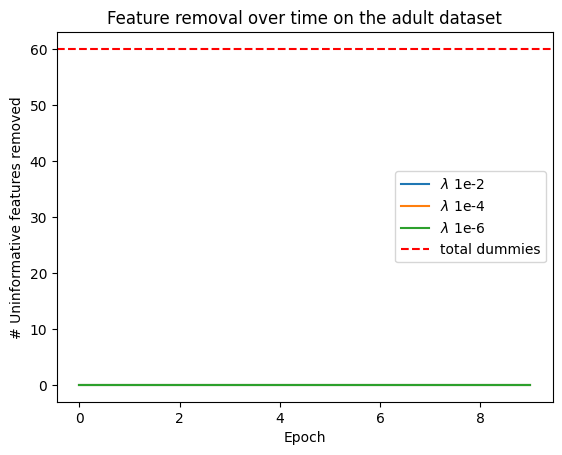

{'0.01': [0.5219885277246654, 0.5219885277246654, 0.5219885277246654, 0.5219885277246654, 0.5217599234815877], '0.0001': [0.5219885277246654, 0.5219885277246654, 0.5219885277246654, 0.5219885277246654, 0.5217599234815877], '1e-06': [0.5219885277246654, 0.5219885277246654, 0.5219885277246654, 0.5219885277246654, 0.5217599234815877]}


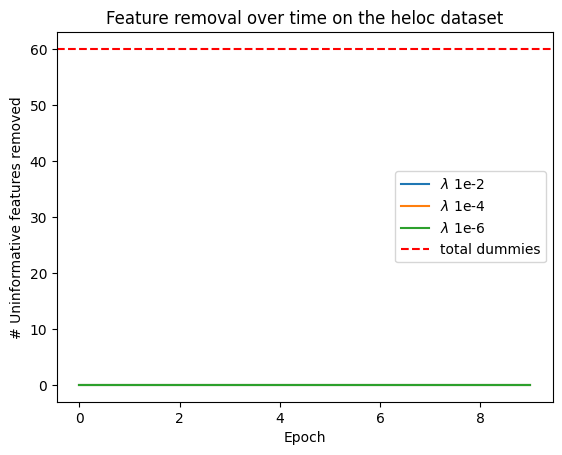

{'0.01': [0.2960280886548168, 0.2960280886548168, 0.2960280886548168, 0.2960280886548168, 0.295873573309921], '0.0001': [0.2960280886548168, 0.2960280886548168, 0.2971253017335967, 0.2980030721966206, 0.295873573309921], '1e-06': [0.2960280886548168, 0.2960280886548168, 0.2960280886548168, 0.2960280886548168, 0.295873573309921]}


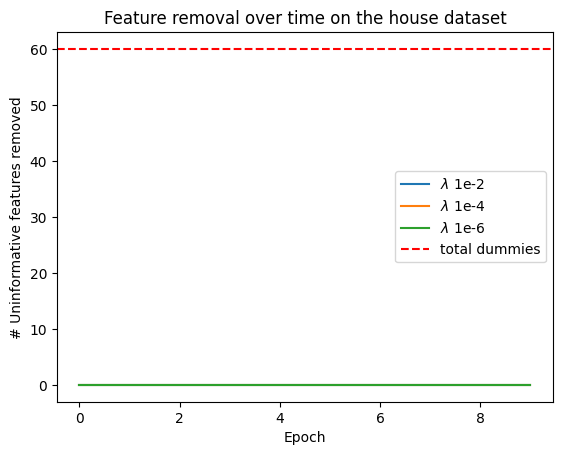

{'0.01': [0.648527865404837, 0.648527865404837, 0.6482649842271293, 0.6482649842271293, 0.6482649842271293], '0.0001': [0.648527865404837, 0.648527865404837, 0.6482649842271293, 0.6482649842271293, 0.6482649842271293], '1e-06': [0.648527865404837, 0.648527865404837, 0.6482649842271293, 0.6482649842271293, 0.6482649842271293]}


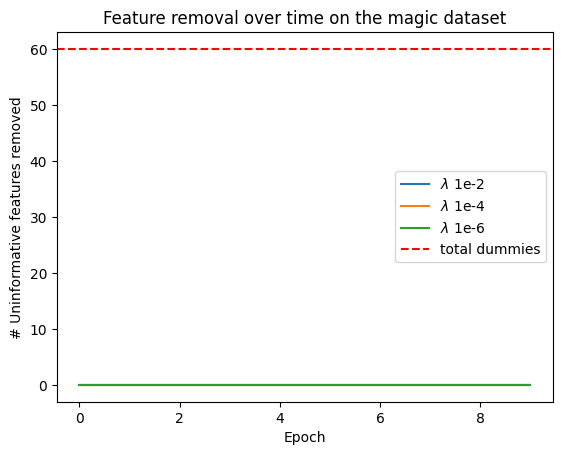

In [2]:
plot2()

## Experiment 3

In [2]:
run3()

dataset: adult
  fold: 1


100%|███████████████████████| 10/10 [00:06<00:00,  1.46it/s]


  fold: 2


100%|███████████████████████| 10/10 [00:06<00:00,  1.47it/s]


  fold: 3


100%|███████████████████████| 10/10 [00:06<00:00,  1.46it/s]


  fold: 4


100%|███████████████████████| 10/10 [00:06<00:00,  1.48it/s]


  fold: 5


100%|███████████████████████| 10/10 [00:06<00:00,  1.52it/s]


dataset: heloc
  fold: 1


100%|███████████████████████| 10/10 [00:02<00:00,  4.02it/s]


  fold: 2


100%|███████████████████████| 10/10 [00:02<00:00,  3.84it/s]


  fold: 3


100%|███████████████████████| 10/10 [00:02<00:00,  4.11it/s]


  fold: 4


100%|███████████████████████| 10/10 [00:02<00:00,  4.00it/s]


  fold: 5


100%|███████████████████████| 10/10 [00:02<00:00,  4.06it/s]


dataset: house
  fold: 1


100%|███████████████████████| 10/10 [00:05<00:00,  1.97it/s]


  fold: 2


100%|███████████████████████| 10/10 [00:05<00:00,  1.98it/s]


  fold: 3


100%|███████████████████████| 10/10 [00:05<00:00,  1.94it/s]


  fold: 4


100%|███████████████████████| 10/10 [00:04<00:00,  2.01it/s]


  fold: 5


100%|███████████████████████| 10/10 [00:05<00:00,  1.92it/s]


dataset: magic
  fold: 1


100%|███████████████████████| 10/10 [00:05<00:00,  1.96it/s]


  fold: 2


100%|███████████████████████| 10/10 [00:04<00:00,  2.46it/s]


  fold: 3


100%|███████████████████████| 10/10 [00:04<00:00,  2.45it/s]


  fold: 4


100%|███████████████████████| 10/10 [00:04<00:00,  2.46it/s]


  fold: 5


100%|███████████████████████| 10/10 [00:04<00:00,  2.47it/s]


In [2]:
plot3()

<Figure size 640x480 with 0 Axes>

## Experiment 4

In [22]:
with open('exp4accs.json') as file:
    accuracies = json.load(file)
    
with open('exp4spars.json') as file:
    sparsities = json.load(file)
    
for i in range(4):
    
    print('dataset:', dataset_names[i])
    
    r2ntab_accuracies = accuracies['r2ntab'][i*10:i*10+10]
    classy_accuracies = accuracies['classy'][i*10:i*10+10]
    r2ntab_sparsities = sparsities['r2ntab'][i*10:i*10+10]
    classy_sparsities = sparsities['classy'][i*10:i*10+10]
    
    print('  r2ntab mean accuracy:', sum(r2ntab_accuracies) / len(r2ntab_accuracies), ', std:', np.std(r2ntab_accuracies))
    print('  classy mean accuracy:', sum(classy_accuracies) / len(classy_accuracies), ', std:', np.std(classy_accuracies))
    print('  r2ntab mean sparsity:', sum(r2ntab_sparsities) / len(r2ntab_sparsities), ', std:', np.std(r2ntab_sparsities))
    print('  classy mean sparsity:', sum(classy_sparsities) / len(classy_sparsities), ', std:', np.std(classy_sparsities))

dataset: adult
  r2ntab mean accuracy: 0.8199237526935189 , std: 0.01769005973062399
  classy mean accuracy: 0.8350737609812697 , std: 0.0
  r2ntab mean sparsity: 35.7 , std: 12.41813190459821
  classy mean sparsity: 195.0 , std: 0.0
dataset: heloc
  r2ntab mean accuracy: 0.6951242829827915 , std: 0.016573699354165722
  classy mean accuracy: 0.709847036328872 , std: 1.1102230246251565e-16
  r2ntab mean sparsity: 28.3 , std: 15.84960567332828
  classy mean sparsity: 60.0 , std: 0.0
dataset: house
  r2ntab mean accuracy: 0.8247092385341233 , std: 0.02540702018492649
  classy mean accuracy: 0.8591178406846611 , std: 1.1102230246251565e-16
  r2ntab mean sparsity: 23.0 , std: 7.810249675906654
  classy mean sparsity: 342.0 , std: 0.0
dataset: magic
  r2ntab mean accuracy: 0.8381440588853838 , std: 0.008047814337102475
  classy mean accuracy: 0.8593585699263933 , std: 0.0
  r2ntab mean sparsity: 38.9 , std: 6.28410693734599
  classy mean sparsity: 205.0 , std: 0.0


In [31]:
accs = [[0.8199, 0.6951, 0.8247, 0.8181],
        [0.8283, 0.6980, 0.8161, 0.8361],
        [0.7863, 0.6213, 0.8253, 0.8040],
        [0.7854, 0.6359, 0.8285, 0.7961],
        [0.8351, 0.7098, 0.8591, 0.8594]]
spars = [[35.7, 28.3, 23.0, 38.9],
         [287.9, 103.0, 281.8, 225.9],
         [1251.8, 1440.2, 1794.0, 1491.6],
         [1089.4, 1256.0, 1685.6, 1347.4],
         [195.0, 60.0, 342.0, 205.0]]

plt.style.use('seaborn-darkgrid')

for index, name in enumerate(dataset_names):
    l1 = plt.scatter(spars[0][index], accs[0][index], c='blue', label='R2N-Tab $\lambda$=1e-4')
    l2 = plt.scatter(spars[1][index], accs[1][index], c='orange', label='RIPPER')
    l3 = plt.scatter(spars[2][index], accs[2][index], c='yellow', label='CART')
    l4 = plt.scatter(spars[3][index], accs[3][index], c='purple', label='C4.5')
    l5 = plt.scatter(spars[4][index], accs[4][index], c='red', label='Classy')
    
    plt.xscale('log')

    plt.xlabel('# Conditions', fontsize=15)
    plt.ylabel('Mean test accuracy', fontsize=15)
    plt.ylim([min([row[index] for row in accs])-0.12, max([row[index] for row in accs])+0.1])
    plt.legend(handles=[l1, l2, l3, l4, l5], loc='lower right', fontsize=12)
    plt.savefig(f'exp4plot-{name}.pdf')
    plt.clf()

<Figure size 640x480 with 0 Axes>